In [25]:


import nibabel as nib
import torch
import torch.nn.functional as F
import numpy as np



# === 1. Load the NIfTI (.nii or .nii.gz) image ===
nii_image = nib.load('/Users/maheshworacharya/Desktop/NAAMII/test_dataset/sphere/image/sphere.nii')

data = nii_image.get_fdata()               # numpy array of shape (D, H, W)

# === 2. Convert to PyTorch tensor ===
tensor = torch.from_numpy(data).float()    # shape: (D, H, W)

# === 3. Add batch and channel dimensions ===
tensor = tensor.unsqueeze(0).unsqueeze(0)  # shape: (1, 1, D, H, W)

In [26]:
# Apply constant value padding (e.g., 10 voxels on all sides)
# Padding format in 3D: (W_left, W_right, H_top, H_bottom, D_front, D_back)
padding = (10, 10, 10, 10, 10, 10)
padded_tensor = F.pad(tensor, padding, mode='constant', value=100)
print("before padding shape:", tensor.shape)

print("Padded shape:", padded_tensor.shape)

before padding shape: torch.Size([1, 1, 64, 64, 64])
Padded shape: torch.Size([1, 1, 84, 84, 84])


In [27]:
import matplotlib.pyplot as plt


Original shape: torch.Size([1, 1, 64, 64, 64])
Padded shape: torch.Size([1, 1, 84, 84, 84])


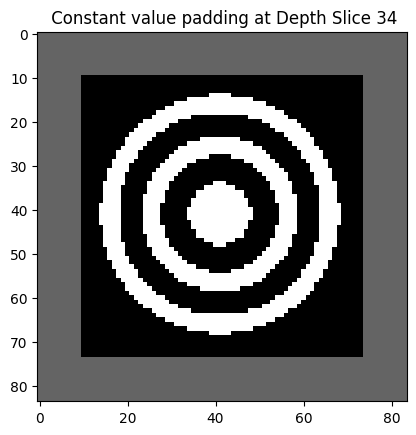

In [28]:
padded_tensor2 = F.pad(tensor, padding, mode='replicate')
print("Original shape:", tensor.shape)
print("Padded shape:", padded_tensor2.shape)
 

#Pick a depth slice, for example the middle one
slice_idx = 34 # since depth is 84
slice_2d = padded_tensor[0, 0, slice_idx, :, :]  # shape: (H, W)

plt.imshow(slice_2d, cmap='grey')

plt.title(f' Constant value padding at Depth Slice {slice_idx}')

plt.show()




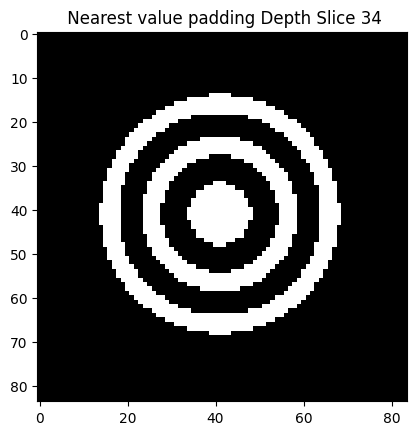

In [29]:
import matplotlib.pyplot as plt

# Pick a depth slice, for example the middle one
slice_idx = 34 # since depth is 84
slice_2d = padded_tensor2[0, 0, :,slice_idx, :, ]  # shape: (H, W)

plt.imshow(slice_2d, cmap='grey')

plt.title(f' Nearest value padding Depth Slice {slice_idx}')

plt.show()


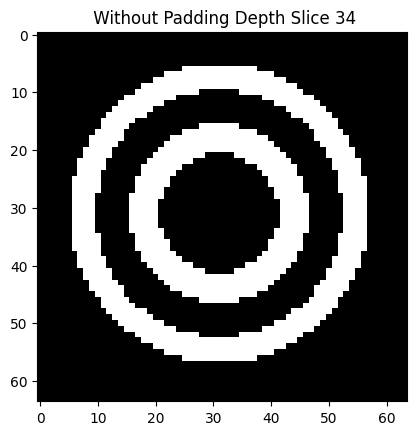

In [30]:
plt.imshow(tensor[0,0,42,:,:], cmap="grey")
plt.title(f' Without Padding Depth Slice {slice_idx}')
plt.show()

In [31]:
padded_tensor_periodic = F.pad(tensor, padding, mode='circular')
#padding = (25, 25, 25, 25, 25, 25)
padding = (35,3, 2, 4, 1, 6)
# W: 5 left, 3 right
# H: 2 top, 4 bottom
# D: 1 front, 6 back


print("Original shape:", tensor.shape)
print("Padded shape (periodic):", padded_tensor_periodic.shape)

Original shape: torch.Size([1, 1, 64, 64, 64])
Padded shape (periodic): torch.Size([1, 1, 84, 84, 84])


Text(0.5, 1.0, 'Periodic_Padded Slice at Depth 34')

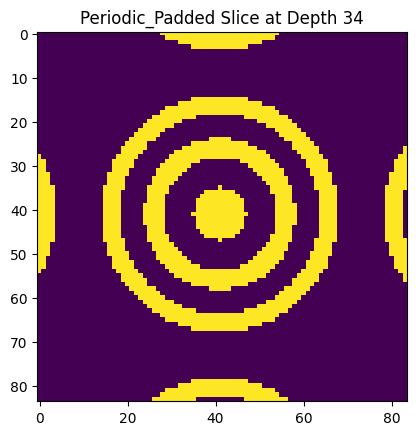

In [32]:
plt.imshow(padded_tensor_periodic[0,0,49,:,:])
plt.title(f"Periodic_Padded Slice at Depth {slice_idx}")

In [33]:
# Define padding (must be < half the size of each dimension)
padding = (5, 5, 5, 5, 5, 5)

# Apply mirror padding (reflect mode)
padded_tensor_mirror = F.pad(tensor, padding, mode='reflect')

print("Original shape:", tensor.shape)
print("Padded shape:", padded_tensor_mirror.shape)


Original shape: torch.Size([1, 1, 64, 64, 64])
Padded shape: torch.Size([1, 1, 74, 74, 74])


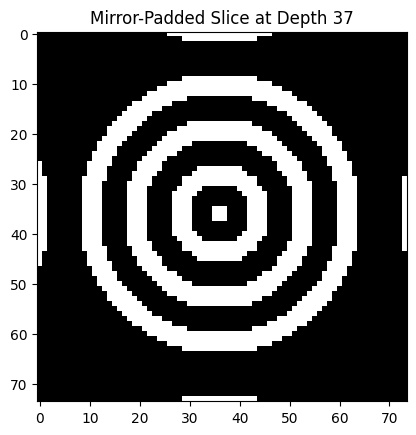

In [34]:
slice_idx = padded_tensor_mirror.shape[2] // 2
slice_2d = padded_tensor_mirror[0, 0, slice_idx, :, :]

plt.imshow(slice_2d, cmap='grey')
plt.title(f"Mirror-Padded Slice at Depth {slice_idx}")
plt.axis('on')

plt.show()


In [35]:
#mean filter

volume = torch.tensor([[
    [[ 1,  2,  3],
     [ 4,  5,  6],
     [ 7,  8,  9]],

    [[10, 11, 12],
     [13, 14, 15],
     [16, 17, 18]],

    [[19, 20, 21],
     [22, 23, 24],
     [25, 26, 27]]
]]).float()  # shape (1, 3, 3, 3)
volume = volume.unsqueeze(0)  # shape becomes (1, 1, 3, 3, 3)



In [36]:
#define mean filter

kernel = torch.ones((1, 1, 3, 3, 3)) / 27  # Every element is 1/27
#apply filter
output = F.conv3d(volume, kernel, padding=1)
print("Output shape:", output.shape)
print("Filtered Volume:\n", output)



Output shape: torch.Size([1, 1, 3, 3, 3])
Filtered Volume:
 tensor([[[[[ 2.2222,  3.5556,  2.5185],
           [ 4.0000,  6.3333,  4.4444],
           [ 3.1111,  4.8889,  3.4074]],

          [[ 5.3333,  8.3333,  5.7778],
           [ 9.0000, 14.0000,  9.6667],
           [ 6.6667, 10.3333,  7.1111]],

          [[ 4.8889,  7.5556,  5.1852],
           [ 8.0000, 12.3333,  8.4444],
           [ 5.7778,  8.8889,  6.0741]]]]])


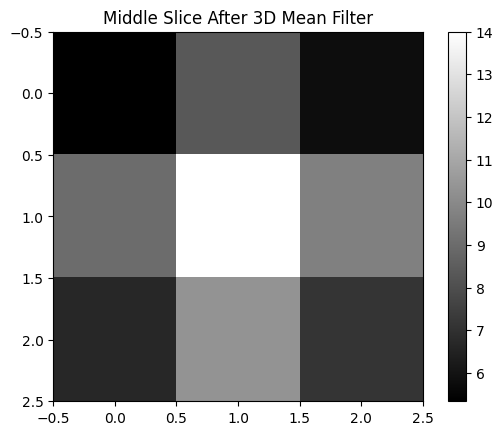

In [38]:
plt.imshow(output[0, 0, 1], cmap='gray')
plt.title("Middle Slice After 3D Mean Filter")
plt.colorbar()
plt.show()
